### Part 1


In [54]:
# all required imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit as im
from scipy.special import erf

In [55]:
#importing required files
data_exp = np.loadtxt('datafile-exp.txt')
data_exres = np.loadtxt('datafile-expresonance.txt')


### Part 1

1. Plotting the historgram

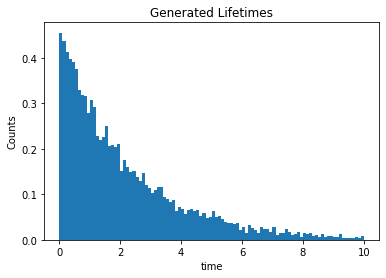

In [56]:
#Plotting for Part 1
plt.hist(data_exp, bins=100,density=True)
plt.title("Generated Lifetimes")
plt.xlabel("time")
plt.ylabel("Counts")
plt.show()

The count halves roughly around 2.0, which can be used as an estimate initial value for the fit.

2. Defining the nll functions

In [57]:
def nll_incorrect(tau):
    """NLL function on normalised 
    probability distribution function. Normalised in the range [0,inf]

    Args:
        tau (float): life time

    Returns:
        float : NLL function
    """
    P = (1/tau)*np.exp(-data_exp/tau)
    return -np.sum(np.log(P))

def nll_correct(tau):
    """NLL function on normalised 
    probability distribution function. Normalised in the range [0,10]

    Args:
        tau (float): life time

    Returns:
        float : NLL function
    """
    n = tau*(1-np.exp(-10/tau)) # normalization for the exponential pdf
    P = (1/n)*np.exp(-data_exp/tau) # exponential pdf
    return -np.sum(np.log(P)) #nll


3. Compile and fit the iMinuit to the nll functions to find the estimated lifetime.

In [58]:
m = im(nll_incorrect,tau=2.0)
#m.limits['tau'] = [0,10]
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.74e+04                   │              Nfcn = 18               │
│ EDM = 3.33e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │   2.096   │   0.030   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────┐
│     │      tau │
├─────┼──────────┤
│ tau │ 0.000879 │
└─────┴──────────┘

In [59]:
tau_val = m.values[0]
tau_err = m.errors[0]
print("The tau estimate with the incorrect normalisation: {:.2f} +/- {:.2f}".format(tau_val,tau_err))

The tau estimate with the incorrect normalisation: 2.10 +/- 0.03


In [60]:
m = im(nll_correct,tau=2.0)
#m.limits['tau'] = [0,10]
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.731e+04                  │              Nfcn = 19               │
│ EDM = 1.01e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │   2.204   │   0.035   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────┐
│     │     tau │
├─────┼─────────┤
│ tau │ 0.00125 │
└─────┴─────────┘

In [61]:
tau_val = m.values[0]
tau_err = m.errors[0]
print("The tau estimate with the correct normalisation: {:.2f} +/- {:.2f}".format(tau_val,tau_err))

The tau estimate with the correct normalisation: 2.20 +/- 0.04


The computational data generated is simulating a detector system that is looking for muon decays in the time range [0,10]. This is practical because we cannot have a detector detecting muon decays for infinite amount of time(forever). Even though the real process does not have a cutoff, the detector does have its limit.

With the nll_correct model, normalised within the cutoff of 10, provides a more accurate estimate because the data being used is within that range. 

With the nll_incorrect estimate, this model normalises as if the data collection range is from 0 to infinity,but there is no data past 10, so the likelihood is disproptionate towards the lower values and consequently underestimates the lifeftime.



### Part 2

1. Plotting the histogram

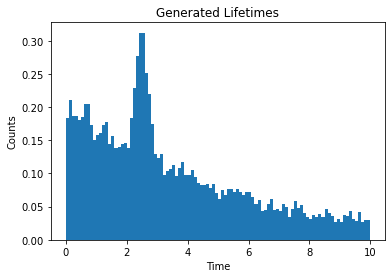

In [62]:
vals,bins,_=plt.hist(data_exres, bins=100,density=True)
plt.title("Generated Lifetimes")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.show()

The data seems to be following fusion of two functions - gaussian function, on top of an exponential
 decay. The count for the exponential halves around 5, and for the gaussian mean is around ~2.5. 

2. Function for the combined nll

In [63]:
def comb_nll(g_mean,tau_exp,c,F):
    """Generates combined NLL function from the sum of Exponential and Gaussian PDFs normalised in the range [0,10]

    Args:
        tau_g (float): lifetime from the Gaussian PDF
        tau_exp (float): lifetime from the Exponential PDF
        c (float): half-width of the Gaussian PDF
        F1 (float): fraction of counts in the Exponential PDF

    Returns:
        float : NLL function
    """
    n_g = 1.25331*c*(erf(0.707107*g_mean/c)-erf(0.707107*(g_mean-10)/c)) # normalization for the gaussian pdf
    P_g = np.exp(-0.5*((data_exres-g_mean)/c)**2)*(1/n_g) # gaussian pdf
    
    n_exp   = (1-np.exp(-10/tau_exp))*tau_exp  # normalization for the exponential pdf
    P_exp = (1/n_exp)*np.exp(-data_exres/tau_exp) #exponential pdf
    
    return -np.sum(np.log(F*P_exp + (1-F)*P_g)) #combined nll
    

In [64]:
m = im(comb_nll,g_mean=2.0,tau_exp=4.0,c=0.2,F=0.8)
m.fixed['c'] = True #fixing the width
#m.limits['tau'] = [0,10]
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.102e+04                  │              Nfcn = 83               │
│ EDM = 7.48e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ g_mean  │   2.500   │   0.017   │            │            │         │         │       │
│ 1 │ tau_exp │   5.04    │   0.14    │            │            │         │         │       │
│ 2 │ c       │   0.200   │   0.002   │            │            │         │         │  yes  │
│ 3 │ F       │   0.903   │   0.006   │            │            │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬─────────────────────────────────────────┐
│         │    g_mean   tau_exp         c         F │
├─────────┼─────────────────────────────────────────┤
│  g_mean │  0.000278 -8.37e-05         0  1.69e-06 │
│ tau_exp │ -8.37e-05    0.0211         0 -8.97e-05 │
│       c │         0         0         0         0 │
│       F │  1.69e-06 -8.97e-05         0  4.06e-05 │
└─────────┴─────────────────────────────────────────┘

In [65]:
g_val,tau_val,c_val,F_val = m.values[0:]
g_err,tau_err,c_err,F_err = m.errors[0:]
print("The Gaussian Mean: {:.2f} +/- {:.2f}".format(g_val,g_err))
print("Exponential Parameter('lifetime'): {:.1f} +/- {:.1f}".format(tau_val,tau_err))
print("Fraction F: {:.3f} +/- {:.3f}".format(F_val,F_err))

The Gaussian Mean: 2.50 +/- 0.02
Exponential Parameter('lifetime'): 5.0 +/- 0.1
Fraction F: 0.903 +/- 0.006


The estimated values from the fit are quite accurate to the true values given in the question.
As we are relying on the joint likelihood, which is simply a product of probability of each event, NLL can be used regardless of how complicated the function is. But it is importnat to recognise the different PDFs ( here, exponential and gaussian) and take into account the fraction of events for each PDFs.

## Verifying Normalisation of the PDFs.

In [66]:
#discretzing parameters for integrating PDFs
dt  =   0.0001
c   =   0.2
r   =   (0,10)
n   =   int(np.diff(r)[0]/dt)+1
p   =   np.linspace(*r,n)


n1 = 1.25331*c*(erf((0.707107*g_val)/c)-erf((0.707107*(g_val-10))/c)) # normalization for the gaussian pdf
P_g = np.exp(-0.5*((p-g_val)/c)**2) # gaussian pdf

print(np.sum(dt*P_g*(1/n1))) #integration discretized



1.0000033011110578


In [73]:
n2   = tau_val*(1-np.exp(-10/tau_val))# normalization for the exponential pdf
P_exp = np.exp(-p/tau_val) #exponential pdf

print(np.sum(dt*P_exp*(1/n2))) #integration discretized


1.0000130797656852
